# Homework 1 Ahmet Akman
This notebook will consist the efforts led by homework 1 and done by Ahmet Akman in the scope of EE449 Course

## Imports

In [1]:
import numpy as np
import sklearn
import torch
import matplotlib.pyplot as plt

## Basic Neural Network Construction and Training


### 1.1




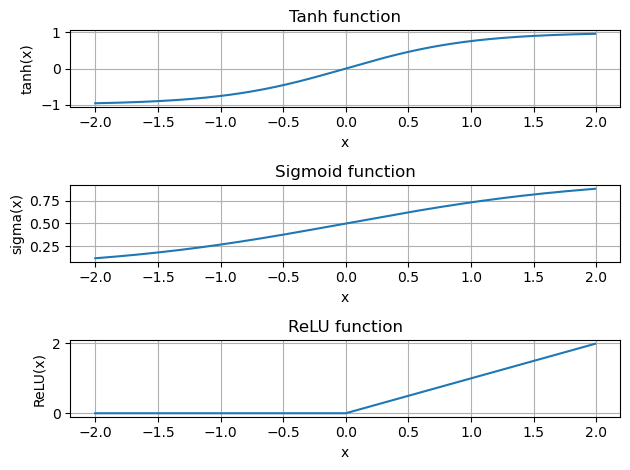

In [2]:
x = np.arange(-2, 2, 0.01, dtype = float)
tanh_result = (np.exp(2*x)-1) / (np.exp(2*x)+1)
sigmoid_result =  1 / (np.exp(-x)+1)
ReLU_result = np.maximum(0,x)


fig, ax = plt.subplots(3)
ax[0].plot(x,tanh_result)
ax[0].set_title("Tanh function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("tanh(x)")
ax[0].grid()

ax[1].plot(x,sigmoid_result)
ax[1].set_title("Sigmoid function")
ax[1].set_xlabel("x")
ax[1].set_ylabel("sigma(x)")
ax[1].grid()

ax[2].plot(x,ReLU_result)
ax[2].set_title("ReLU function")
ax[2].set_xlabel("x")
ax[2].set_ylabel("ReLU(x)")
ax[2].grid()
fig.tight_layout()


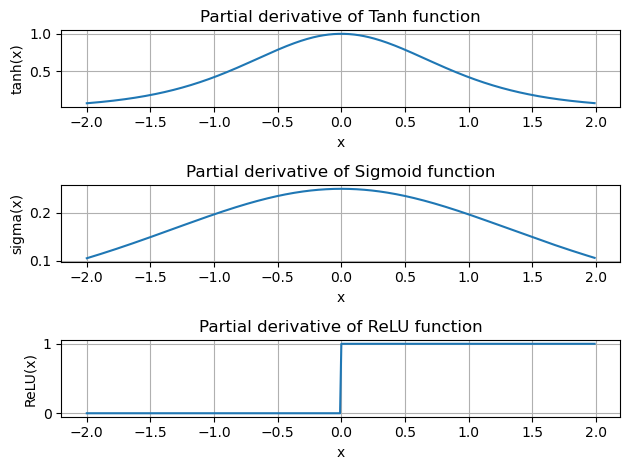

In [3]:
p_tanh_result = 1- (np.exp(x)-np.exp(-x))**2 / (np.exp(x) + np.exp(-x))**2
p_sigmoid_result =  np.exp(-x) / (np.exp(-x)+1)**2
p_ReLU_result = x >= 0 


fig, ax = plt.subplots(3)
ax[0].plot(x, p_tanh_result)
ax[0].set_title("Partial derivative of Tanh function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("tanh(x)")
ax[0].grid()

ax[1].plot(x, p_sigmoid_result)
ax[1].set_title("Partial derivative of Sigmoid function")
ax[1].set_xlabel("x")
ax[1].set_ylabel("sigma(x)")
ax[1].grid()

ax[2].plot(x, p_ReLU_result)
ax[2].set_title("Partial derivative of ReLU function")
ax[2].set_xlabel("x")
ax[2].set_ylabel("ReLU(x)")
ax[2].grid()
fig.tight_layout()

### 1.2
- Sigmoid activated MLP.


Epoch 0: Loss = 1.332
Epoch 1000: Loss = 0.434
Epoch 2000: Loss = 0.337
Epoch 3000: Loss = 0.271
Epoch 4000: Loss = 0.193
Epoch 5000: Loss = 0.169
Epoch 6000: Loss = 0.219
Epoch 7000: Loss = 0.198
Epoch 8000: Loss = 0.298
Epoch 9000: Loss = 0.237
73.0 % of test examples classified correctly.


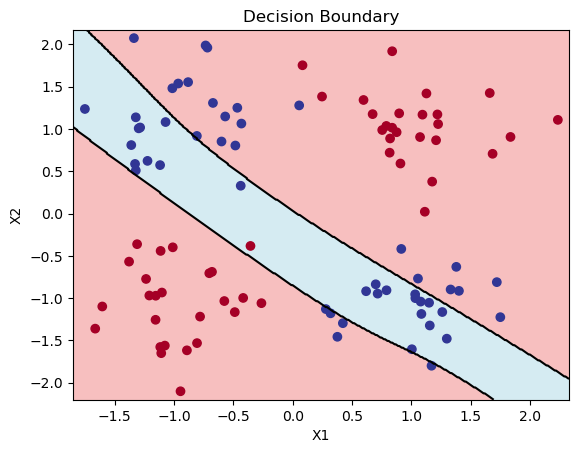

In [12]:
class MLP_sigmoid:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return np.exp(x) / (np.exp(x)+1)
    def sigmoid_derivative(self, x):
        return np.exp(-x) / (np.exp(-x)+1)**2

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.sigmoid_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.sigmoid_derivative(self.output)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.0001
# Create neural network
nn = MLP_sigmoid(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

- Tanh activated MLP. # TODO

Epoch 0: Loss = 0.89
Epoch 1000: Loss = 0.641
Epoch 2000: Loss = 0.276
Epoch 3000: Loss = 0.144
Epoch 4000: Loss = 0.117
Epoch 5000: Loss = 0.109
Epoch 6000: Loss = 0.113
Epoch 7000: Loss = 0.117
Epoch 8000: Loss = 0.142
Epoch 9000: Loss = 0.205
73.0 % of test examples classified correctly.


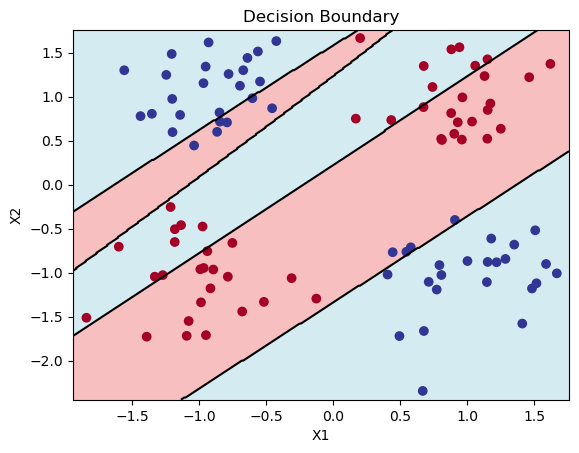

In [14]:
class MLP_tanh:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def tanh(self, x):
        return (np.exp(2*x)-1) / (np.exp(2*x)+1)
    def tanh_derivative(self, x):
        return 1- (np.exp(x)-np.exp(-x))**2 / (np.exp(x) + np.exp(-x))**2

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.tanh(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.tanh_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.tanh_derivative(self.output)
        hidden_delta = hidden_error * self.tanh_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.00001
# Create neural network
nn = MLP_tanh(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

- ReLU Activated MLP


Epoch 0: Loss = 1.498
Epoch 1000: Loss = 0.895
Epoch 2000: Loss = 0.432
Epoch 3000: Loss = 0.059
Epoch 4000: Loss = 0.04
Epoch 5000: Loss = 0.029
Epoch 6000: Loss = 0.025
Epoch 7000: Loss = 0.022
Epoch 8000: Loss = 0.022
Epoch 9000: Loss = 0.022
99.0 % of test examples classified correctly.


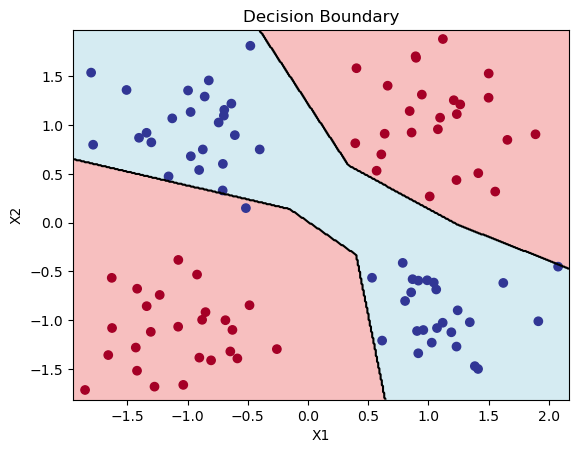

In [17]:
class MLP_ReLU:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def ReLU(self, x):
        return np.maximum(0,x)
    def ReLU_derivative(self, x):
        return x >= 0

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.ReLU(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.ReLU_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.ReLU_derivative(self.output)
        hidden_delta = hidden_error * self.ReLU_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.00001
# Create neural network
nn = MLP_ReLU(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

### 1.3


## Implementing a Convolutional Layer with NumPy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/ahmetakman/akman/METU EEE UNDERGRADUATE EDUCATION/8thTermSpring2024/EE449/Homeworks/hw1/utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = torch.tensor(out).reshape(-1,1,25,25)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for in

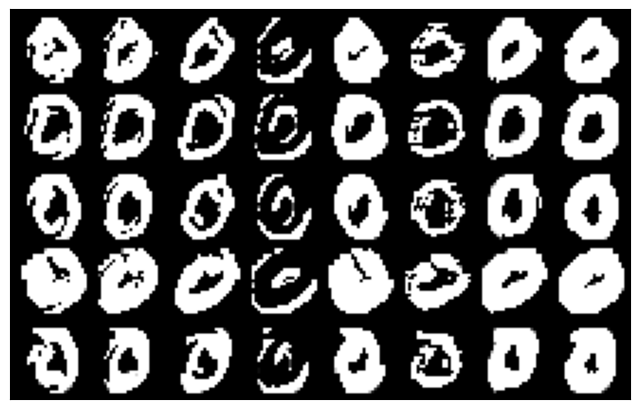

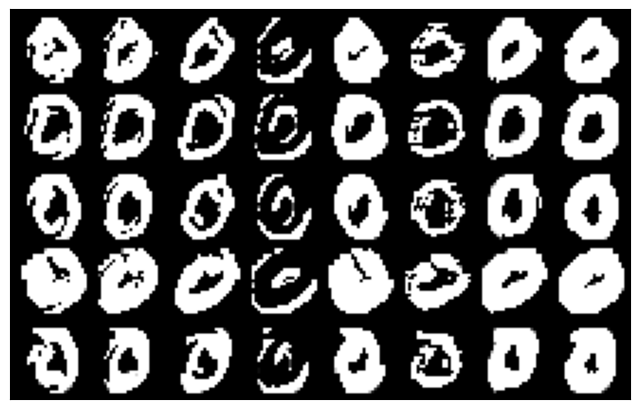

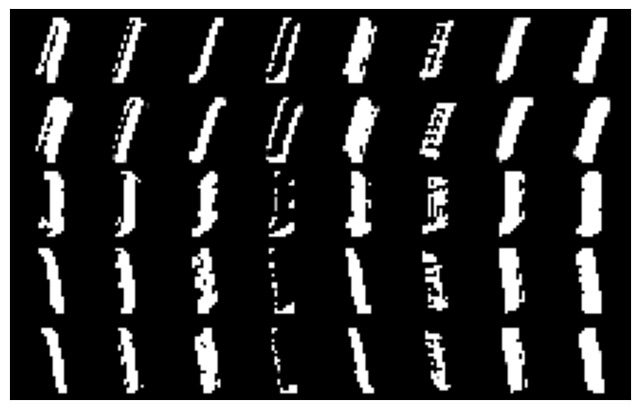

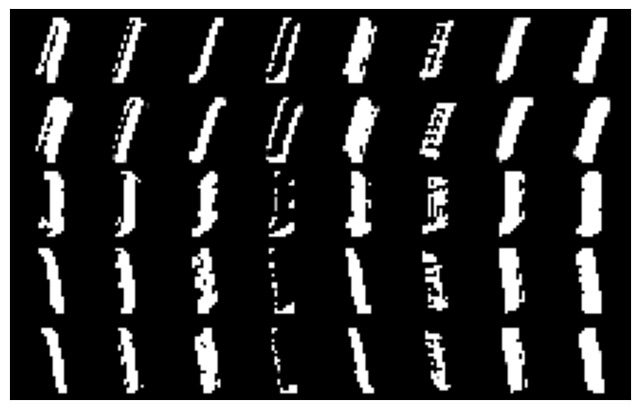

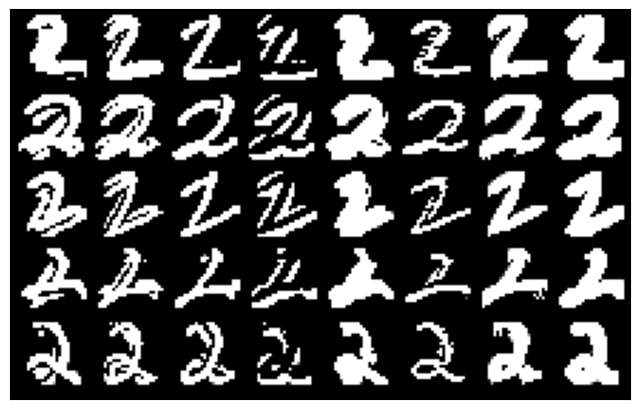

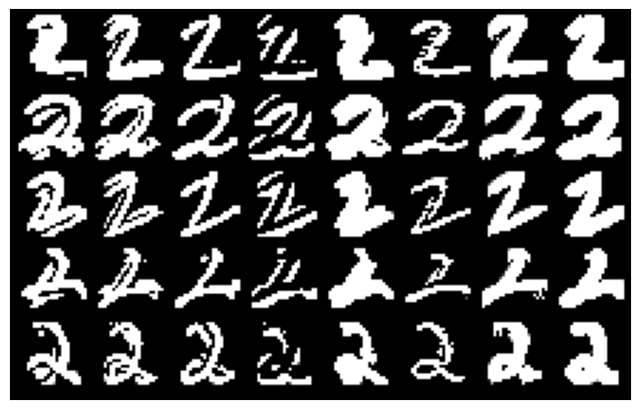

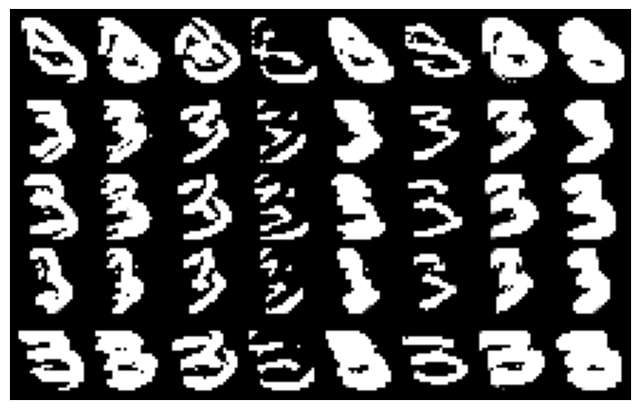

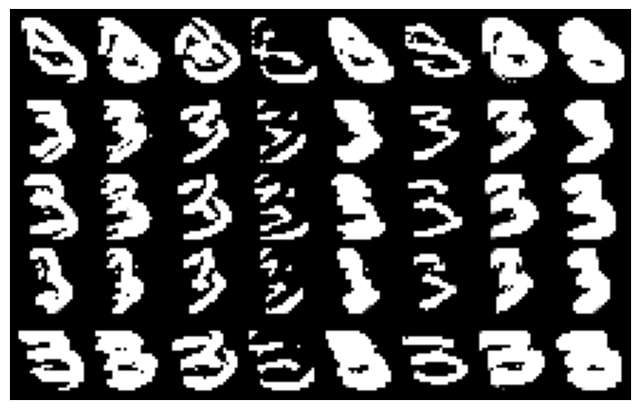

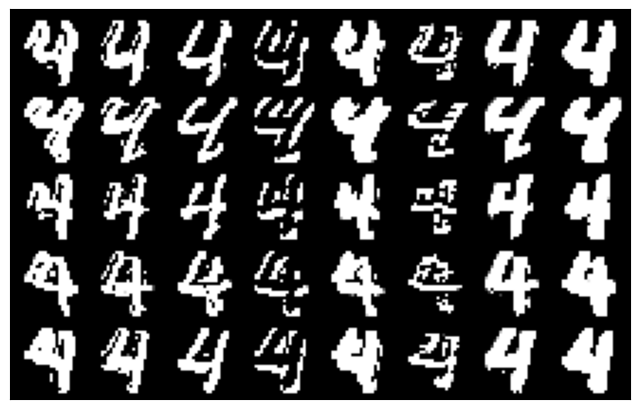

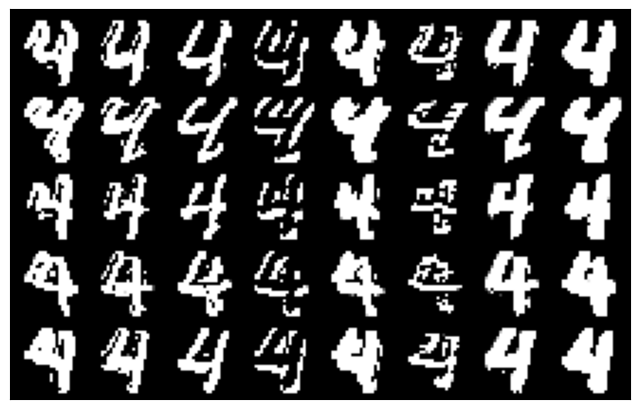

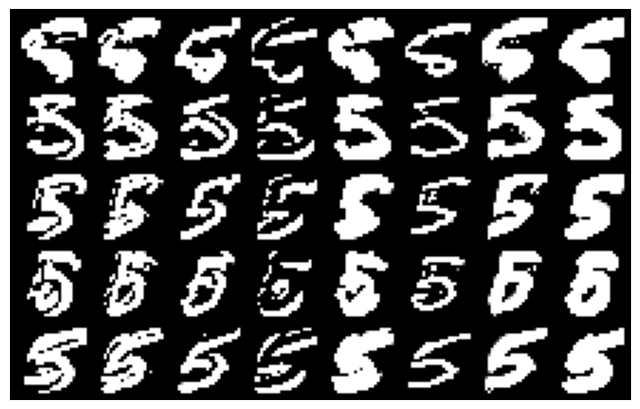

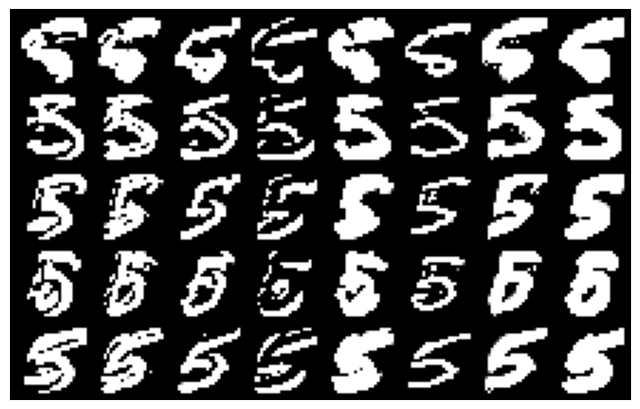

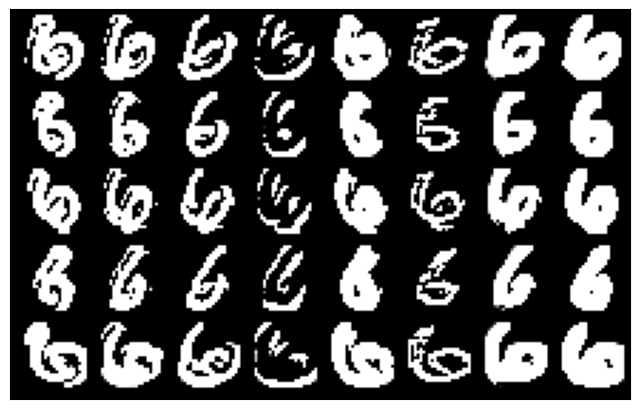

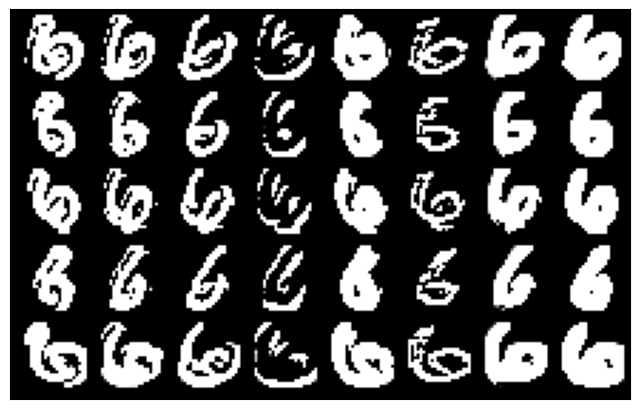

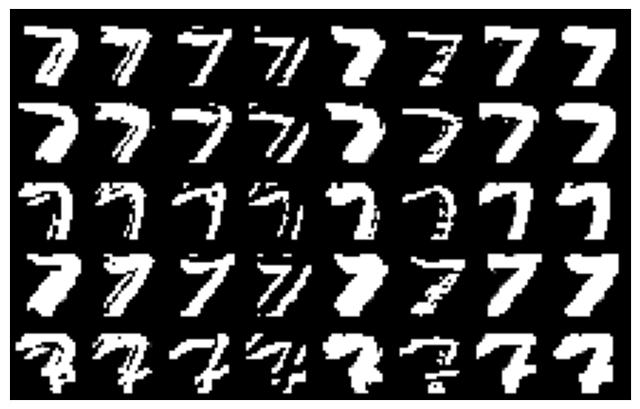

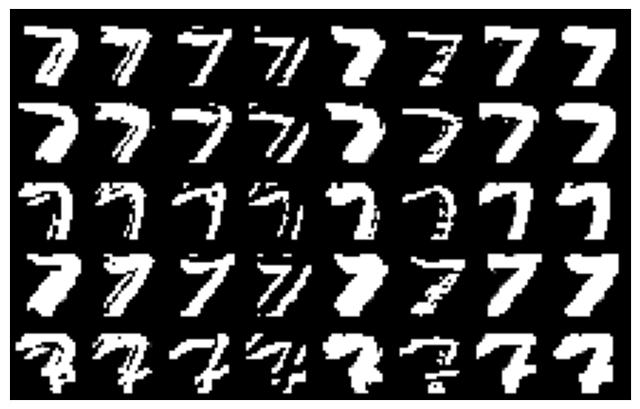

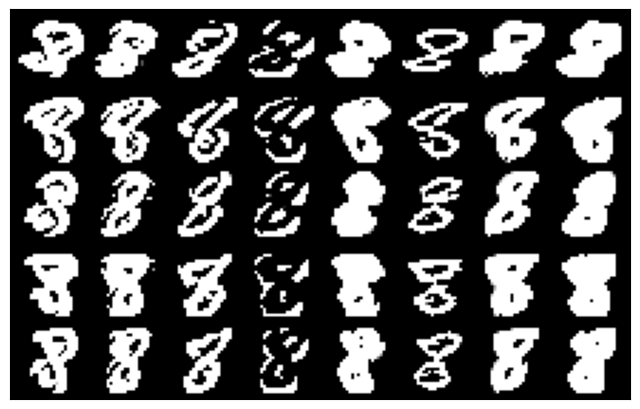

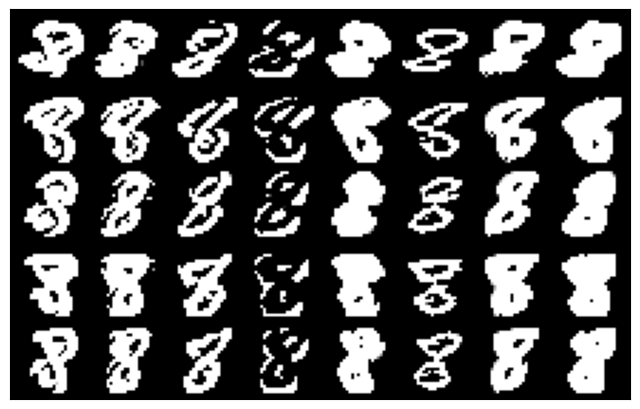

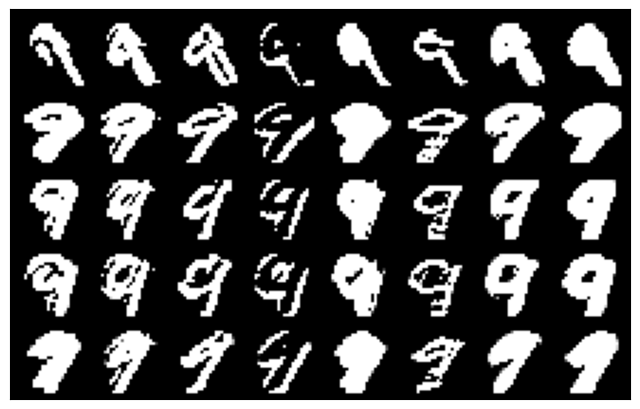

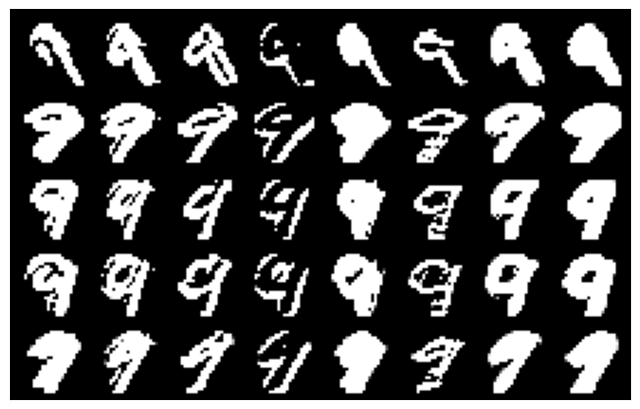

In [32]:


# implement a 2D convolutional layer using numpy
def my_conv2d(input, kernel):
    # input shape: [batch size, input_channels, input_height, input_width]
    # kernel shape: [output_channels, input_channels, filter_height, filter width]
    batch_size, input_channels, input_height, input_width = input.shape
    output_channels, input_channels, filter_height, filter_width = kernel.shape
    # output shape: [batch size, output_channels, output_height, output_width]
    output_height = input_height - filter_height + 1
    output_width = input_width - filter_width + 1
    output = np.zeros((batch_size, output_channels, output_height, output_width))
    for b in range(batch_size):
        for oc in range(output_channels):
            for ic in range(input_channels):
                for i in range(output_height):
                    for j in range(output_width):
                        output[b, oc, i, j] = np.sum(input[b, ic, i:i+filter_height, j:j+filter_width] * kernel[oc, ic])
    return output

# input shape: [batch size, input_channels, input_height, input_width]
kernel=np.load('data/kernel.npy')

for i in range(10):
    input=np.load('data/samples_{}.npy'.format(i))
    # input shape: [output_channels, input_channels, filter_height, filter width]
    out = my_conv2d(input, kernel)
    out_check = torch.conv2d(torch.tensor(input).float(), torch.tensor(kernel).float())
    np.save('outputs/out_{}.npy'.format(i), out)

    from utils import part2Plots
    part2Plots(out = out, save_dir='outputs', filename='out_{}'.format(i) )
    part2Plots(out = out_check, save_dir='outputs', filename='out_{}_check'.format(i) )

## 2.2


## Experimenting ANN Architectures

## Experimenting Activation Functions

## Experimenting Learning Rate